In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [21]:
env = gym.make('FrozenLake-v0')

In [25]:
def learn(num_episodes=2000, discount_rate=0.99, learning_rate=0.85, mode='noise'):
    # Construct an empty table for Q values
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    rList = []
    for i in range(num_episodes):
    #   Reset environment to get start state
        cur_state = env.reset()
        rAll = 0
        done = False

        while not done:
    #       Choose action for the current state with some randomness
            if mode == 'noise':
                action = np.argmax(Q[cur_state, :] + np.random.randn(1, env.action_space.n) / (i+1))
            elif mode == 'e-greedy':
                if np.random.rand(1) < (1./(i//100 + 1)):
                    action = env.action_space.sample()
                else:
                    action = np.argmax(Q[cur_state, :])
            else:
                action = np.argmax(Q[cur_state, :])

    #       Get new state and reward
            new_state, reward, done, _ = env.step(action)

    #       Update Q table
            Q[cur_state, action] = (1-learning_rate) * Q[cur_state, action] + \
                        learning_rate * (reward + discount_rate * np.max(Q[new_state,:]))

            rAll += reward
            cur_state = new_state
        
        rList.append(rAll)
    print("Success rate: " + str(sum(rList)/num_episodes))
    print("Final Q-TableValues")
    print("LEFT DOWN RIGHT UP")
    print(Q)
    plt.bar(range(len(rList)), rList, color='blue')
    plt.show()

Success rate: 0.0145
Final Q-TableValues
LEFT DOWN RIGHT UP
[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.99]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]]


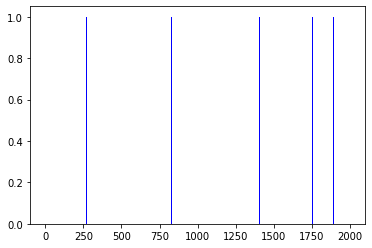

In [34]:
learn(learning_rate=1)

Success rate: 0.5225
Final Q-TableValues
LEFT DOWN RIGHT UP
[[7.26573347e-01 4.32665298e-03 9.00198282e-03 9.13418571e-03]
 [1.05923390e-03 9.53670450e-04 1.03340069e-03 6.24709713e-01]
 [2.62030747e-03 4.36958991e-03 1.75148067e-03 5.93366886e-01]
 [3.03539976e-03 1.50225213e-04 1.05231578e-03 4.77639340e-01]
 [8.81158995e-01 9.38019498e-04 2.64819541e-03 9.39676858e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61667153e-04 9.66617425e-05 4.19986598e-05 2.30079887e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.83741060e-04 2.78536392e-03 2.02655533e-03 3.61175850e-01]
 [2.05204095e-04 6.81933727e-01 1.09896321e-04 2.16824599e-04]
 [9.72226708e-02 1.60034944e-03 1.48713083e-04 2.51626608e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.10220277e-03 7.99521100e-04 9.28384995e-01 8.45987626e-04]
 [0.00000000e+00 0.00000000e+00 1.69141766e-01 0.00000000e

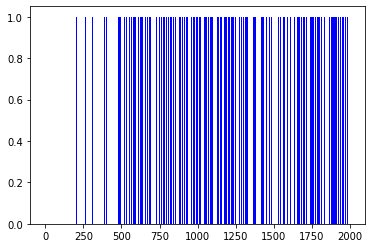

In [38]:
learn(learning_rate=0.85)